

# Plotting with `matplotlib` 

*examples in this notebook are based on Nicholas Hunt-Walker's [plotting tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) and Jake VanderPlas' [matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/06_MatplotlibIntro.ipynb)*

In this notebook we will learn how to make basic plots like scatter plots, histograms, and line plots using matplotlib in python.

## The gallery

If you know what you want a plot to look like, but you don't know the code to make it, go to the [matplotlib gallery](http://matplotlib.org/gallery.html), where you can see examples and see the source code that generated them.

## Basic Plot Commands

Some of the basic plotting commands include
```python
plt.plot()         # all purpose plotting function
plt.errorbar()     # plotting with errorbars
plt.loglog(), plt.semilogx(), plt.semilogy()   # plotting in logarithmic space
```

In [41]:
import matplotlib.pyplot as plt 

import numpy as np 
from astropy.io import ascii

%matplotlib inline

Let's make some sample `x` and `y` data, and plot it with the `plt.plot` command:

In [42]:
x = np.arange(10)
y = np.arange(10,20,1)

print(x,y)

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]


You can customize a bunch of features within the plot:
* `markersize` sets the symbol size 
* `color` sets the color
* The first argument after y sets the marker shape. Try: `x`, `.`, `o`, `+`, `--`, `-.`, `:`

You could look at `plt.plot?` or check out [this list of markers.](https://matplotlib.org/3.1.0/api/markers_api.html)

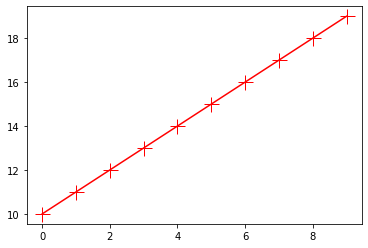

In [43]:
plt.plot(x,y,marker="+",markersize=15,color='red')

Let's plot a sine function:

Text(0, 0.5, 'y_label')

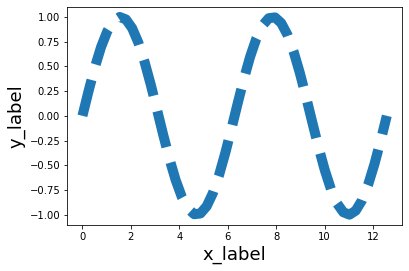

In [44]:
a = np.linspace(0,4*np.pi,50)
b = np.sin(a)

plt.plot(a,b,linestyle='dashed',linewidth=10)

plt.xlabel('x_label',fontsize=18)
plt.ylabel('y_label',fontsize=18)

Let's plot a figure with errorbars: (Remember you can always Google [plt error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to learn more about a function.)

<ErrorbarContainer object of 3 artists>

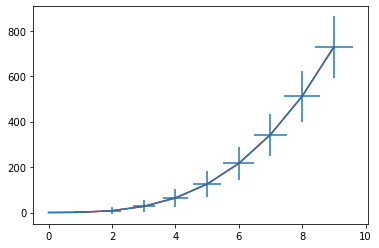

In [45]:
x = np.arange(0,10,1)
y = x**3

x_errors = 0.2*np.sqrt(x)
y_errors = 5*np.sqrt(y)

plt.plot(x,y,color='red')
plt.errorbar(x,y,yerr=y_errors,xerr=x_errors)

There are three options for log-plots: `plt.loglog()`, `plt.semilogx()`, `plt.semilogy()`

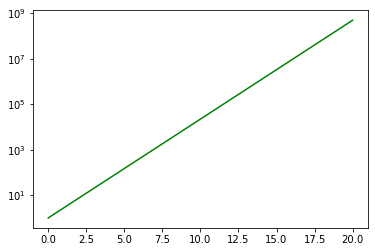

In [46]:
x_green = np.linspace(0,20,100)
y_green = np.exp(x_green)

plt.semilogy(x_green,y_green,color='green')

To add a legend to your plot, include the `label` argument in the plot command, then call `plt.legend()` at the end of the plotting commands.

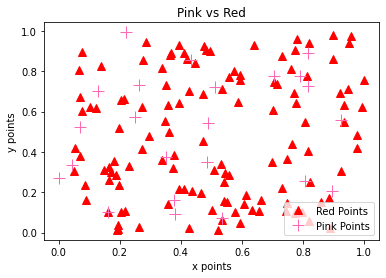

In [47]:
xred = np.random.rand(125)
yred = np.random.rand(125)

xpink = np.random.rand(23) 
ypink = np.random.rand(23)

plt.plot(xred,yred,'^',color='red',markersize=8,label='Red Points')
plt.plot(xpink,ypink,'+',color='hotpink',markersize=12,label='Pink Points')

plt.xlabel('x points')
plt.ylabel('y points')

plt.title('Pink vs Red')

plt.legend(loc='lower right')

To save figures in python you just use `plt.savefig()`:

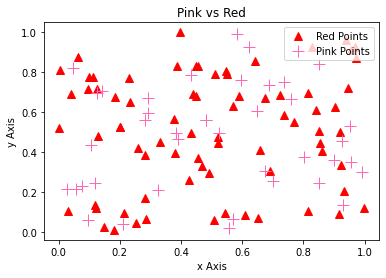

In [48]:
xred = np.random.rand(75)
yred = np.random.rand(75)

xpink = np.random.rand(40)
ypink = np.random.rand(40)

plt.plot(xred,yred,'^',color='red',markersize=8,label='Red Points')
plt.plot(xpink,ypink,'+',color='hotpink',markersize=12,label='Pink Points')

plt.xlabel('x Axis')
plt.ylabel('y Axis')

plt.title('Pink vs Red')

plt.legend(loc='upper right')

plt.savefig(fname='pinkvsred')

## Kepler's Law Example
Let's make a log-log plot displaying [Kepler's law](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion). 

Get AU and T values from the second table **Modern data (Wolfram Alpha Knowledgebase 2018)**

Text(0, 0.5, 'Period (Years)')

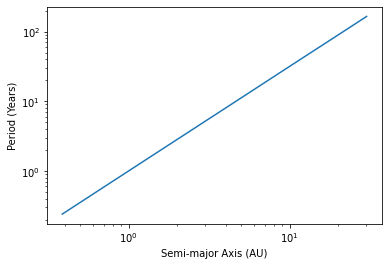

In [51]:
a_AU = np.array([0.38710,0.72333,1,1.52366,5.20336,9.53707,19.1913,30.0690])
T_yr = np.array([87.77,224.7,365.25,686.95,4332.62,10775.599,30687.15,60190.03])*0.00273973

G    = 6.67e-8
Msun = 1.99e+33

plt.loglog(a_AU,T_yr)
plt.xlabel('Semi-major Axis (AU)')
plt.ylabel('Period (Years)')

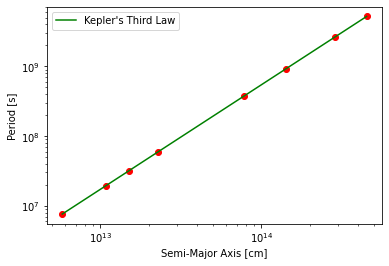

In [54]:
def keplers_third_law(a, M): 
    return np.sqrt((4*np.pi**2 * a**3) / (G * M))

a_cm = a_AU * 1.496e+13

T_s = T_yr * 3.154e+7

plt.loglog(a_cm,T_s,'o',color='red')
plt.loglog(a_cm,keplers_third_law(a_cm,Msun),'-',label="Kepler's Third Law",color='green')
plt.xlabel('Semi-Major Axis [cm]')
plt.ylabel('Period [s]')
plt.legend()

## Scatter Plots 

In [55]:
galaxy_table = ascii.read('data/mygalaxy.dat')

print(galaxy_table)

print(galaxy_table['col2'])

  col1    col2  
------- --------
49.3317  3.74013
50.3509  4.76035
 65.766  1.99268
46.5797  4.27444
25.0454 0.277328
55.1341 -2.20327
56.4011 0.708788
    ...      ...
-59.481 -44.0844
-59.629 -44.3239
-59.735   -44.54
-59.953 -44.5124
-60.422 -45.5494
-60.031 -43.7715
 -60.55 -45.0019
Length = 12738 rows
  col2  
--------
 3.74013
 4.76035
 1.99268
 4.27444
0.277328
-2.20327
0.708788
     ...
-44.0844
-44.3239
  -44.54
-44.5124
-45.5494
-43.7715
-45.0019
Length = 12738 rows


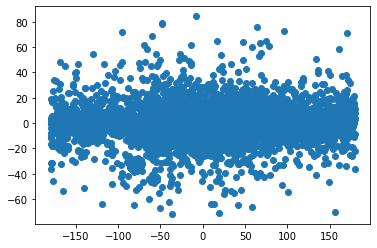

In [56]:
plt.scatter(galaxy_table['col1'],galaxy_table['col2'])

**SIDE NOTE:** If you are running things in the IPython environment or from a script you would want to do something like the following to get your plots to show up in a new window:
```python
plt.scatter(galaxy_table['col1'], galaxy_table['col2'])
plt.show()
```

In a Jupyter Notebook, you will see the plot outputs whether or not you call `plt.show()` because we've used the `%matplotlib inline` magic function.

Let's break down these basic examples:
- We are running functions called "plot" or "scatter" that take specific arguments.
- The most basic arguments that these functions take are in the form of (x,y) values for the plot, and we get these from a data table. 
- We can use more specific arguments like 'o' to customize things like the plot symbol (marker) that we are using. 

With plt.scatter() you can change things like point color, point size, point edge color and point type. The argument syntax for adding these options are as follows: 

- color = 'colorname'; could be 'b' for blue, 'k' for black, 'r' for red, or [more detailed names](https://matplotlib.org/3.3.2/gallery/color/named_colors.html) like 'Salmon'
- s = number; changes marker size
- markeredgecolor = `None` or 'colorname'
- marker = 'symbolname', i.e. `'s'` for square, `'o'` for circle, `'+'` for cross, `'x'` for x, `'*'` for star, `'^'` for triangle, etc.

Let's do an example:

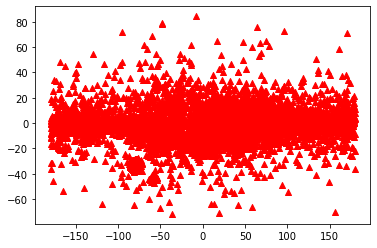

In [58]:
# Use a scatter plot to re-make the galaxy table plot but use different arguments 
# such as color and marker size
plt.scatter(galaxy_table['col1'],galaxy_table['col2'], color='r',marker='^')

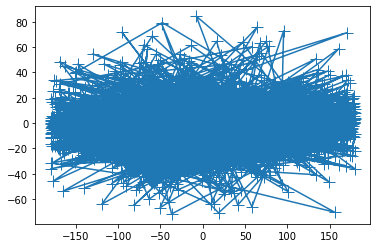

In [60]:
# Here we can test the equivalent statement using plt.plot(), 
# note that the syntax is a little different 
plt.plot(galaxy_table['col1'],galaxy_table['col2'],marker='+',markersize=12)

The plot is starting to look better, but there is one really important thing that is missing: **axis labels.** These are very easy to put in in matplotlib using ```plt.xlabel() and plt.ylabel().``` These functions take strings as their arguments for the labels, but can also take other arguments that case the text format: 

Text(0, 0.5, 'Galactic Latitude [degrees]')

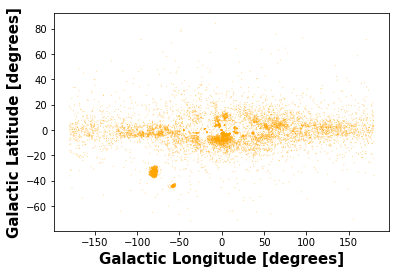

In [62]:
plt.scatter(galaxy_table['col1'],galaxy_table['col2'],color='orange',s=1,edgecolor='None',alpha=0.5)

plt.xlabel('Galactic Longitude [degrees]',fontweight='bold',fontsize=15) 
plt.ylabel('Galactic Latitude [degrees]',fontweight='bold',fontsize=15)

We can also change things like the axis limits with ```plt.xlim()``` and ```plt.ylim().``` For these we just want to feed it a range of values for each axis: 

(-100.0, 100.0)

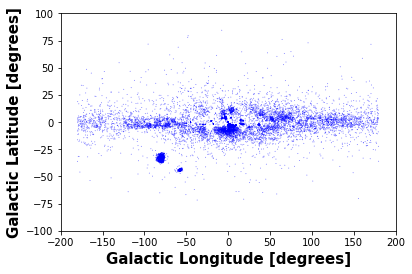

In [63]:
plt.scatter(galaxy_table['col1'],galaxy_table['col2'],color='blue',s=1,edgecolor='None',alpha=0.5)

plt.xlabel('Galactic Longitude [degrees]',fontweight='bold',fontsize=15)
plt.ylabel('Galactic Latitude [degrees]',fontweight='bold',fontsize=15)
#put in some limits
plt.xlim(-200,200)
plt.ylim(-100,100)

The axis labels are easy to read, but the numbers and tick marks on the axis are pretty small. We can tweak lots of little things about how the tick marks look, how they are spaced, and if we want to have a grid to guide the reader's eyes. I will give just a couple of examples here: 

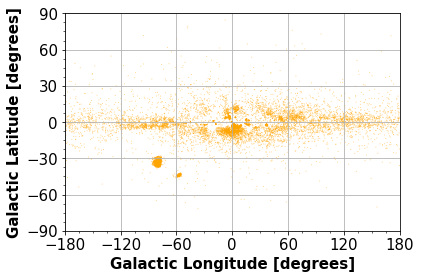

In [66]:
plt.scatter(galaxy_table['col1'],galaxy_table['col2'],color='orange',s=1,edgecolor='None',alpha=0.5)

plt.xlabel('Galactic Longitude [degrees]',fontweight='bold',fontsize=15)
plt.ylabel('Galactic Latitude [degrees]',fontweight='bold',fontsize=15)

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.xticks(range(-180,210,60),fontsize=15)
plt.yticks(range(-90,120,30),fontsize=15)

plt.minorticks_on()

plt.grid()

By default the figure is square, but maybe this is not the best way to represent our data. If this is the case we can change the size of the figure: 

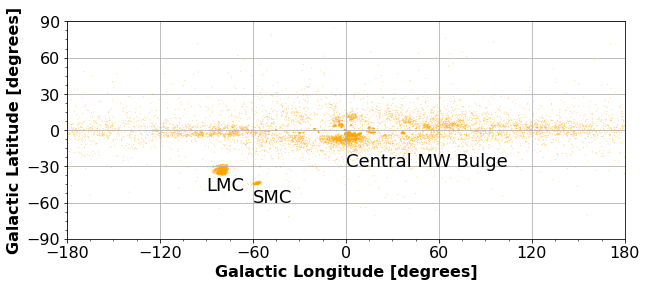

In [71]:
plt.figure(figsize=(10,4))

plt.scatter(galaxy_table['col1'],galaxy_table['col2'],color='orange',s=1,edgecolor='None',alpha=0.5)

plt.text(-90,-50, 'LMC',fontsize=18)
plt.text(-60,-60, 'SMC',fontsize=18)
plt.text(0,-30,'Central MW Bulge',fontsize=18)

plt.xlabel('Galactic Longitude [degrees]',fontweight='bold',fontsize=16)
plt.ylabel('Galactic Latitude [degrees]',fontweight='bold',fontsize=16)

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.xticks(range(-180,210,60),fontsize=16)
plt.yticks(range(-90,120,30),fontsize=16)

plt.minorticks_on()

plt.grid()

The last thing I'll mention here is how to put text on plots. This too is simple as long as you specify (x,y) coordinates for the text. 

## Exercise 1 ##
Take the plot of that demonstrates Kepler's laws in our solar system, and:

- label each data point to the correct planet. 
- change the size of axes label to make them clearer.
- make any aesthetic changes that you think enhances the meaning you're tryin to convey with the plot (maybe you want to convey that each planet is a different size, and so change the marker size; maybe you want to convey that inner planets are rocky and outer planets are gaseous, so change the marker colour for a subset of them; etc)

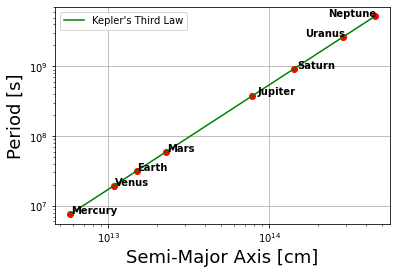

In [113]:
plt.loglog(a_cm,T_s,'o',color='red')
plt.loglog(a_cm,keplers_third_law(a_cm,Msun),'-',label="Kepler's Third Law",color='green')

plt.text(5.9e+12,7.7e+06,'Mercury',fontweight='bold')
plt.text(1.1e+13,1.97e+07,'Venus',fontweight='bold')
plt.text(1.5e+13,3.2e+07,'Earth',fontweight='bold')
plt.text(2.3e+13,6e+07,'Mars',fontweight='bold')
plt.text(8.4e+13,4e+08,'Jupiter',fontweight='bold')
plt.text(1.48e+14,9.4e+08,'Saturn',fontweight='bold')
plt.text(1.67e+14,2.7e+09,'Uranus',fontweight='bold')
plt.text(2.3e+14,5.2e+09,'Neptune',fontweight='bold')

plt.xlabel('Semi-Major Axis [cm]',fontsize=18)
plt.ylabel('Period [s]',fontsize=18)
plt.grid()
plt.legend()

In [76]:
print(a_cm)

[5.79101600e+12 1.08210168e+13 1.49600000e+13 2.27939536e+13
 7.78422656e+13 1.42674567e+14 2.87101848e+14 4.49832240e+14]


In [77]:
print(T_s)

[7.58430086e+06 1.94165706e+07 3.15616485e+07 5.93600943e+07
 3.74386392e+08 9.31131192e+08 2.65170990e+09 5.20108575e+09]


## Histograms 

Histograms can be a great way to visualize data, and they are (surprise) easy to make it python! The basic command is 
```python
    num, bins, patches = plt.hist(array, bins=number)
```
Num refers to the number of elements in each bin, and bins refers to each bin on the x-axis. Note that bins actually gives you bin EDGES, so there will always be num+1 number of bins. We can ignore patches for now. As arguments plt.hist() takes an array and the number of bins you would like (default is bins=10). Some other optional arguments for plt.hist are: 

- **range:** lower and upper range of bins 
- **normed:** set to 'True' or 'False.' If true it will return a normalized probability distribution instead of just raw number counts for the y-axis. 
- **histtype:** can be step to something like 'step', 'stepfilled', or 'bar' for the histogram style. 
- **weights:** an array of values that must be of the same size as the number of bins. It controls the factor by which the number counts are weighted, i.e. it makes your number counts into number_counts*weight. 

Text(0, 0.5, 'Counts')

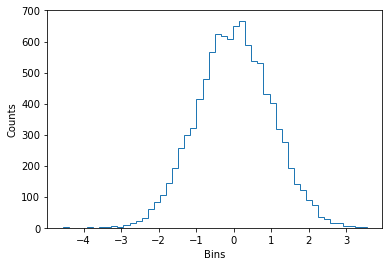

In [114]:
x = np.random.randn(10000)
num,bins,patches = plt.hist(x,bins=50,histtype='step')

plt.xlabel('Bins')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

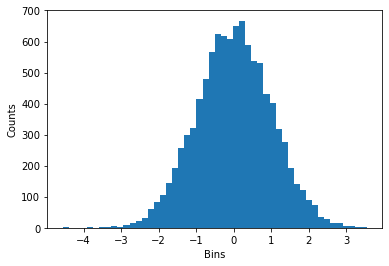

In [115]:
plt.hist(x,bins=50)

plt.xlabel('Bins')
plt.ylabel('Counts')

Text(0.5, 0, 'Bins')

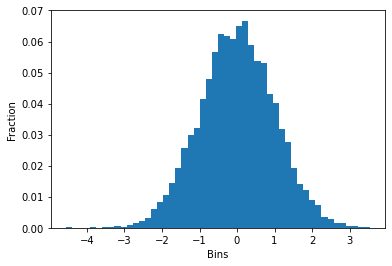

In [116]:
xweights = np.ones_like(x)/len(x)
plt.hist(x,bins=50,weights=xweights)
plt.ylabel('Fraction')
plt.xlabel('Bins')

In [117]:
print('Nums:',num)
print('Bins:',bins)

print(len(num))
print(len(bins))

Nums: [  1.   0.   0.   0.   1.   0.   1.   2.   5.   4.   9.  15.  23.  33.
  60.  83. 107. 143. 192. 256. 300. 321. 416. 478. 566. 625. 617. 609.
 649. 667. 590. 536. 532. 432. 402. 319. 276. 193. 141. 121.  89.  75.
  35.  27.  16.  15.   7.   5.   4.   2.]
Bins: [-4.56463449 -4.40237093 -4.24010737 -4.07784381 -3.91558025 -3.75331669
 -3.59105314 -3.42878958 -3.26652602 -3.10426246 -2.9419989  -2.77973534
 -2.61747179 -2.45520823 -2.29294467 -2.13068111 -1.96841755 -1.80615399
 -1.64389044 -1.48162688 -1.31936332 -1.15709976 -0.9948362  -0.83257264
 -0.67030909 -0.50804553 -0.34578197 -0.18351841 -0.02125485  0.14100871
  0.30327226  0.46553582  0.62779938  0.79006294  0.9523265   1.11459006
  1.27685361  1.43911717  1.60138073  1.76364429  1.92590785  2.08817141
  2.25043497  2.41269852  2.57496208  2.73722564  2.8994892   3.06175276
  3.22401632  3.38627987  3.54854343]
50
51


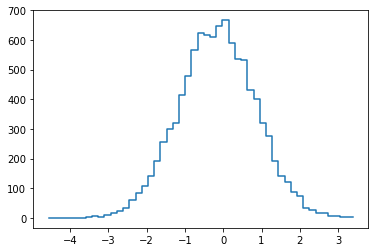

In [118]:
plt.plot(bins[:-1],num,drawstyle='steps')

## Subplots

Subplots are a way put multiple plots in what amounts to the same figure; think of subplots like an array of plots! You can read more about the `plt.subplots` syntax [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html). The syntax for setting labels and titles can be slightly different when using subplots than when making just one plot. I tend to use `plt.subplots` for all my plotting, even with just one plot. If you don't specify `nrows` and `ncols`, you will just produce one plot.

Text(0, 0.5, 'Y-Axis')

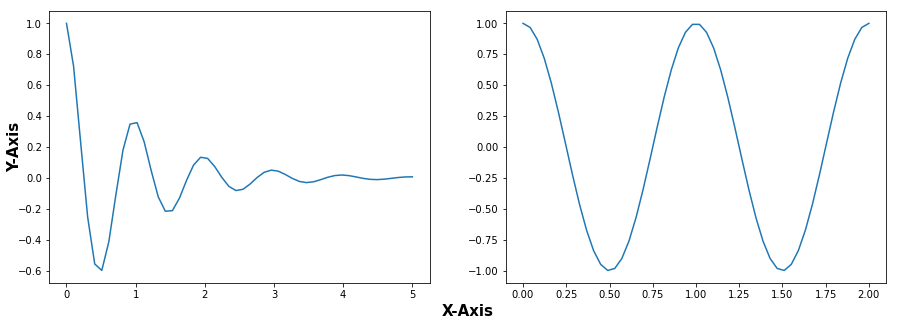

In [127]:
#set up a variable for the total figure, and for each subplot axis
#figsize sets up the size of the total figure. You can play around with these 
# values to see what they do
# nrows and ncols define the number of rows and columns, respectively

#Define some x and y values for plotting:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#Plot x1 and y1 on the first axis, ax[0]

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax0.plot(x1,y1)
ax1.plot(x2,y2)

#The syntax for setting x and y labels is slightly different 
#when you're calling it on an individual axis

fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('X-Axis', fontsize=15, fontweight='bold')
plt.ylabel('Y-Axis', fontsize=15, fontweight='bold')

#Do the same thing for the second axis, ax[1]

Text(0, 0.5, 'Y-Axis')

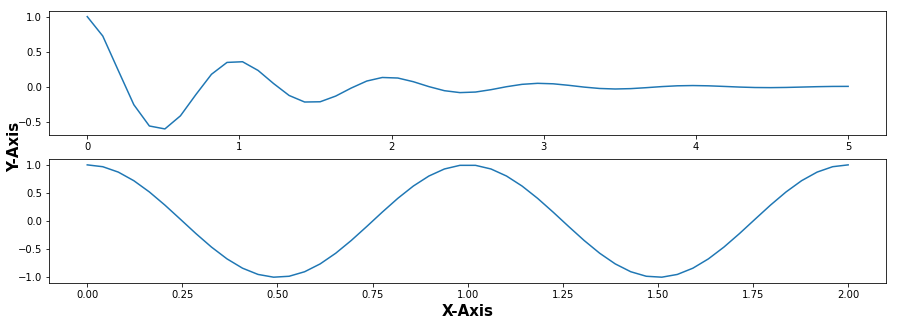

In [129]:
#Now create the same two plots, but instead of having them side by side, stack them on top of each other

#Fill in the ??? below to create two stacked plots. 
#Try to set the figsize to make the plot look good (not all stretched out)
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(15,5))

#Define some x and y values for plotting:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#Plot x1 and y1 on the first axis, ax[0]

ax0.plot(x1,y1)
ax1.plot(x2,y2)

#Do the same thing for the second axis, ax[1]

fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('X-Axis', fontsize=15, fontweight='bold')
plt.ylabel('Y-Axis', fontsize=15, fontweight='bold')


You can do fancier things with subplots like have different plots share the same axis, put smaller plots as insets to larger plots, etc. Again, take a look at things like the matplotlib library for examples of different plots. 